In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [216]:
pd.set_option('display.max_columns',100)
df = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory='False')
df.rename(columns={u:str(u).replace('.', ' ').title() for u in list(df.columns)},inplace=True)
df.head()

<ipython-input-216-51445b735299>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/AviationData.csv', encoding='latin1', low_memory='False')


,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number Of Engines,Engine Type,Far Description,Schedule,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88889 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50132 non-null  object 
 9   Airport Name            52704 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft Damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87507 non-null  object 
 14  Make                    88826 non-null

In [218]:
df.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [219]:
# We can drop the Event Id, Accident Number, Location, Country, Latitude, Longitude, Airport Code, Airport Name, Registration Number,
# Far Description, Schedule, Number Of Engines, Weather Condition, Broad Phase Of Flight


In [220]:
df.head()
dropped_columns = ['Event Id','Accident Number','Location','Country','Latitude','Longitude','Airport Code','Airport Name',\
                    'Registration Number','Far Description','Schedule','Number Of Engines','Engine Type','Weather Condition',\
                    'Broad Phase Of Flight', 'Air Carrier', 'Total Uninjured']
df.drop(dropped_columns,axis=1,inplace=True)

In [221]:
df['Aircraft Category'].value_counts()

Aircraft Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [222]:
# We are only interested in Airplanes, so we filter other categories out
df = df[df['Aircraft Category']=='Airplane']
df.drop('Aircraft Category', axis=1, inplace=True)

In [223]:
#Drop down the rows that are not from top manufacturers
#'Embraer', 'Bombardier', 'Textron Aviation', 'Airbus','Boeing', 'Pilatus', 'Pilatus Aircraft', 'Honda Aircraft', 'Mitsubishi', 'Gulfstream Aerospace', 'Gulfstream', 'Sukhoi', 'Dassault', 'Antonov'


In [224]:
df['Purpose Of Flight'].value_counts()

Purpose Of Flight
Personal                     16154
Instructional                 3212
Aerial Application            1068
Unknown                        886
Business                       785
Positioning                    359
Flight Test                    226
Ferry                          176
Aerial Observation             170
Skydiving                      166
Other Work Use                 158
Executive/corporate            151
Banner Tow                      89
Air Race show                   74
Public Aircraft - Federal       53
Public Aircraft                 43
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    17
Public Aircraft - Local         12
Air Race/show                    7
ASHO                             6
Air Drop                         3
PUBS                             3
External Load                    1
Name: count, dtype: int64

In [225]:
purposes_of_interest = ['Personal','Business','Flight Test','Other Work Use','Executive/corporate']
df = df[df['Purpose Of Flight'].isin(purposes_of_interest)]
df.head()

,Investigation Type,Event Date,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Report Status,Publication Date
7,Accident,1982-01-01,Non-Fatal,Substantial,Cessna,140,No,Personal,0.0,0.0,0.0,Probable Cause,01-01-1982
8,Accident,1982-01-01,Non-Fatal,Substantial,Cessna,401B,No,Business,0.0,0.0,0.0,Probable Cause,01-01-1982
12,Accident,1982-01-02,Non-Fatal,Destroyed,Bellanca,17-30A,No,Personal,0.0,0.0,1.0,Probable Cause,02-01-1983
13,Accident,1982-01-02,Fatal(1),Destroyed,Cessna,R172K,No,Personal,1.0,0.0,0.0,Probable Cause,02-01-1983
14,Accident,1982-01-02,Fatal(1),Destroyed,Navion,A,No,Personal,1.0,0.0,0.0,Probable Cause,02-01-1983


In [226]:
df['Investigation Type'].value_counts()

Investigation Type
Accident    17303
Incident      171
Name: count, dtype: int64

In [227]:
#We also drop all the incidents because they have been prevented, keeping only accidents.
#After that no need to keep the Investigation.Type column.
df = df[df['Investigation Type']=='Accident']
df.drop('Investigation Type',axis=1, inplace=True)
df.head()

,Event Date,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Report Status,Publication Date
7,1982-01-01,Non-Fatal,Substantial,Cessna,140,No,Personal,0.0,0.0,0.0,Probable Cause,01-01-1982
8,1982-01-01,Non-Fatal,Substantial,Cessna,401B,No,Business,0.0,0.0,0.0,Probable Cause,01-01-1982
12,1982-01-02,Non-Fatal,Destroyed,Bellanca,17-30A,No,Personal,0.0,0.0,1.0,Probable Cause,02-01-1983
13,1982-01-02,Fatal(1),Destroyed,Cessna,R172K,No,Personal,1.0,0.0,0.0,Probable Cause,02-01-1983
14,1982-01-02,Fatal(1),Destroyed,Navion,A,No,Personal,1.0,0.0,0.0,Probable Cause,02-01-1983


In [228]:
dict(df['Report Status'].value_counts())

{'Probable Cause': 4262,
 'Foreign': 63,
 "The pilot's failure to maintain directional control during the landing roll.": 50,
 "The pilot's failure to maintain directional control during landing.": 36,
 'A loss of engine power for undetermined reasons.': 33,
 'A total loss of engine power for undetermined reasons.': 26,
 'The loss of engine power for undetermined reasons.': 21,
 'The pilot\x92s failure to maintain directional control during the landing roll.\r\n\r': 20,
 'The pilot\x92s failure to maintain directional control during the landing roll.': 19,
 'The pilot\x92s failure to maintain directional control during landing.': 15,
 "The pilot's failure to maintain directional control of the airplane during landing.": 15,
 "The pilot's improper recovery from a bounced landing.": 15,
 "The pilot's failure to maintain directional control during the takeoff roll.": 13,
 'The pilot\x92s failure to maintain directional control during landing.\r\n\r': 12,
 "The pilot's improper landing fla

In [229]:
# It seems unless the report blames a poor decision by the pilot, the cause of the accidental is due to a failure
# by the aircraft.
# We filter reports that have the word pilot out of the dataset

In [230]:
# df = df[df['Report Status'].str.contains('pilot')]
df['NO Pilot In Report'] = ~df['Report Status'].str.contains('pilot', case=False, na=False)
df[df['NO Pilot In Report']]
df.drop(['Report Status','NO Pilot In Report'], axis=1, inplace=True)
df.head()

,Event Date,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Publication Date
7,1982-01-01,Non-Fatal,Substantial,Cessna,140,No,Personal,0.0,0.0,0.0,01-01-1982
8,1982-01-01,Non-Fatal,Substantial,Cessna,401B,No,Business,0.0,0.0,0.0,01-01-1982
12,1982-01-02,Non-Fatal,Destroyed,Bellanca,17-30A,No,Personal,0.0,0.0,1.0,02-01-1983
13,1982-01-02,Fatal(1),Destroyed,Cessna,R172K,No,Personal,1.0,0.0,0.0,02-01-1983
14,1982-01-02,Fatal(1),Destroyed,Navion,A,No,Personal,1.0,0.0,0.0,02-01-1983


In [231]:
# We are not interested in VERY OLD airplanes, therefore we filter for accidents that happened since the 2000's
# And we drop teh event and publication dates
df['Event Year'] = pd.DatetimeIndex(df['Event Date']).year
df = df[df['Event Year']>=2000]
df.drop(['Event Date', 'Publication Date'], axis=1, inplace=True)
df.head()

,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
47743,Non-Fatal,Substantial,Myers,Q-2,Yes,Personal,NaN,NaN,1.0,2000
47869,Fatal(1),Destroyed,Cessna,182M,No,Personal,1.0,NaN,NaN,2000
48814,Fatal(4),Destroyed,Piper,PA-24-260,No,Personal,4.0,NaN,NaN,2000
48908,Non-Fatal,Substantial,Steel/vans,RV6,Yes,Personal,NaN,NaN,1.0,2000
49402,Non-Fatal,Destroyed,Boeing,707-312B,No,Business,NaN,NaN,10.0,2000


In [232]:
df.value_counts('Make')

Make
CESSNA                  2980
PIPER                   1906
Cessna                  1379
Piper                    816
BEECH                    725
                        ... 
Gerald Dan Coppock         1
Giroux                     1
Gladstone                  1
Glasair Aviation LLC       1
unknown                    1
Name: count, Length: 3270, dtype: int64

In [233]:
df

,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
47743,Non-Fatal,Substantial,Myers,Q-2,Yes,Personal,NaN,NaN,1.0,2000
47869,Fatal(1),Destroyed,Cessna,182M,No,Personal,1.0,NaN,NaN,2000
48814,Fatal(4),Destroyed,Piper,PA-24-260,No,Personal,4.0,NaN,NaN,2000
48908,Non-Fatal,Substantial,Steel/vans,RV6,Yes,Personal,NaN,NaN,1.0,2000
49402,Non-Fatal,Destroyed,Boeing,707-312B,No,Business,NaN,NaN,10.0,2000
...,...,...,...,...,...,...,...,...,...,...
88859,Non-Fatal,Substantial,ARADO-FLUGZEUGWERKE GMBH,FW190 A-5,No,Personal,0.0,0.0,0.0,2022
88861,Non-Fatal,Substantial,CESSNA,305A,No,Personal,0.0,0.0,0.0,2022
88873,Non-Fatal,Substantial,CIRRUS DESIGN CORP,SR22,No,Personal,0.0,0.0,0.0,2022
88877,Minor,Substantial,CESSNA,R172K,No,Personal,0.0,1.0,0.0,2022


In [234]:
# Same information from Injury Severity is already contained in other columns so we drop it
df.drop('Injury Severity', axis=1, inplace=True)
df.head()

,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
47743,Substantial,Myers,Q-2,Yes,Personal,NaN,NaN,1.0,2000
47869,Destroyed,Cessna,182M,No,Personal,1.0,NaN,NaN,2000
48814,Destroyed,Piper,PA-24-260,No,Personal,4.0,NaN,NaN,2000
48908,Substantial,Steel/vans,RV6,Yes,Personal,NaN,NaN,1.0,2000
49402,Destroyed,Boeing,707-312B,No,Business,NaN,NaN,10.0,2000


In [235]:
# Now we fix NaN values
df.isna().sum()

Aircraft Damage             37
Make                         1
Model                        3
Amateur Built                2
Purpose Of Flight            0
Total Fatal Injuries      2014
Total Serious Injuries    1995
Total Minor Injuries      1712
Event Year                   0
dtype: int64

In [236]:
df['Total Fatal Injuries'].fillna(0,inplace=True)
df['Total Serious Injuries'].fillna(0,inplace=True)
df['Total Minor Injuries'].fillna(0,inplace=True)

In [237]:
df.isna().sum()

Aircraft Damage           37
Make                       1
Model                      3
Amateur Built              2
Purpose Of Flight          0
Total Fatal Injuries       0
Total Serious Injuries     0
Total Minor Injuries       0
Event Year                 0
dtype: int64

In [238]:
df[df['Aircraft Damage'].isna()]

,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
53453,NaN,Cessna,120,No,Personal,0.0,1.0,0.0,2002
60041,NaN,Gulfstream Aerospace,G-200,No,Executive/corporate,0.0,1.0,0.0,2005
61759,NaN,Cessna,172S,No,Personal,0.0,1.0,0.0,2006
62047,NaN,Cessna,172,No,Personal,0.0,1.0,0.0,2007
63917,NaN,Pilatus,PC-12/45,No,Personal,0.0,0.0,0.0,2008
64200,NaN,Cessna,182B,No,Personal,2.0,0.0,0.0,2008
65603,NaN,CESSNA,172,No,Personal,0.0,0.0,1.0,2008
66950,NaN,MOONEY,M20F,No,Personal,0.0,0.0,0.0,2009
67446,NaN,CESSNA,150,No,Personal,0.0,0.0,1.0,2009
67904,NaN,CESSNA,172G,No,Personal,0.0,0.0,1.0,2010


In [239]:
df['Aircraft Damage'].value_counts()

Aircraft Damage
Substantial    13572
Destroyed       1474
Minor             57
Unknown           34
Name: count, dtype: int64

In [240]:
df.groupby('Aircraft Damage').sum()[['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries']]

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries
Aircraft Damage,,,
Destroyed,2420.0,152.0,280.0
Minor,5.0,5.0,13.0
Substantial,2520.0,3262.0,2503.0
Unknown,9.0,7.0,11.0


In [241]:
df.loc[df['Total Fatal Injuries']>0, 'Aircraft Damage'] = 'Substantial'
df.loc[df['Total Fatal Injuries']==0, 'Aircraft Damage'] = 'Minor'
df.isna().sum()

Aircraft Damage           0
Make                      1
Model                     3
Amateur Built             2
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Event Year                0
dtype: int64

In [242]:
# Next we drop rows with Make, Model and Amateur Built is incomplete
df.dropna(inplace=True)
df.isna().sum()

Aircraft Damage           0
Make                      0
Model                     0
Amateur Built             0
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Event Year                0
dtype: int64

In [243]:
df['Make'] = df['Make'].str.title()

In [244]:
df.head()

,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
47743,Minor,Myers,Q-2,Yes,Personal,0.0,0.0,1.0,2000
47869,Substantial,Cessna,182M,No,Personal,1.0,0.0,0.0,2000
48814,Substantial,Piper,PA-24-260,No,Personal,4.0,0.0,0.0,2000
48908,Minor,Steel/Vans,RV6,Yes,Personal,0.0,0.0,1.0,2000
49402,Minor,Boeing,707-312B,No,Business,0.0,0.0,10.0,2000


### Finally, let us filter the data to the top makers. When starting a new company, we would need a large quantity of planes same from the same model and make and only one of the top companies could do that.

#### The top companies are 'Embraer' , 'Bombardier', 'Textron Aviation', 'Airbus', 'Boeing', 'Pilatus', 'Pilatus Aircraft', 'Honda Aircraft','Mitsubishi','Gulfstream Aerospace','Gulfstream','Sukhoi','Dassault','Antonov' but they might have different names in the data set so need to find their other names in order to change them

In [245]:
top_makes = ['Embraer' , 'Bombardier' , 'Textron', 'Airbus', 'Boeing', 'Pilatus', 'Honda', 
             'Mitsubishi', 'Gulfstream', 'Sukhoi', 'Dassault', 'Antonov', 'Cessna', 'Beechcraft'
             'Piaggio', 'Cirrus', 'Piper', 'Hawker', 'Nextant']

for make in top_makes:
    df['Make'].loc[df['Make'].str.contains(make)] = make

df_top_makes = df[df['Make'].isin(top_makes)]
df_top_makes

# df['Make'].loc[df['Make'].str.contains('Textron')] = 'Textron'
# df['Make'].loc[df['Make'].str.contains('Textron')]

<ipython-input-245-090ac0f983f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'].loc[df['Make'].str.contains(make)] = make
<ipython-input-245-090ac0f983f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'].loc[df['Make'].str.contains(make)] = make
<ipython-input-245-090ac0f983f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'].loc[df['Make'].str.contains(make)] = make
<ipython-input-245-090ac0f983f2>:6

,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
47869,Substantial,Cessna,182M,No,Personal,1.0,0.0,0.0,2000
48814,Substantial,Piper,PA-24-260,No,Personal,4.0,0.0,0.0,2000
49402,Minor,Boeing,707-312B,No,Business,0.0,0.0,10.0,2000
50058,Minor,Dassault,MYSTERE FALCON 900,No,Executive/corporate,0.0,0.0,0.0,2001
50100,Minor,Cessna,340A,No,Personal,0.0,0.0,0.0,2001
...,...,...,...,...,...,...,...,...,...
88844,Minor,Cessna,A185F,No,Personal,0.0,0.0,0.0,2022
88858,Minor,Piper,PA-44,No,Personal,0.0,1.0,0.0,2022
88861,Minor,Cessna,305A,No,Personal,0.0,0.0,0.0,2022
88873,Minor,Cirrus,SR22,No,Personal,0.0,0.0,0.0,2022


In [246]:
df_top_makes.to_csv('data/top_makes.csv')

# We start plotting the data to get more insights

### First let us start counting the number of accidents each company has since 2000, and then see how the number of them changed over the years

In [247]:
make2accidents = df_top_makes.groupby('Make').count()['Model'].sort_values(ascending=False)
dict(make2accidents)

{'Cessna': 4383,
 'Piper': 2759,
 'Cirrus': 278,
 'Boeing': 104,
 'Gulfstream': 29,
 'Hawker': 29,
 'Pilatus': 20,
 'Embraer': 14,
 'Mitsubishi': 12,
 'Textron': 11,
 'Bombardier': 7,
 'Dassault': 7,
 'Honda': 3,
 'Sukhoi': 3,
 'Antonov': 2,
 'Airbus': 1}

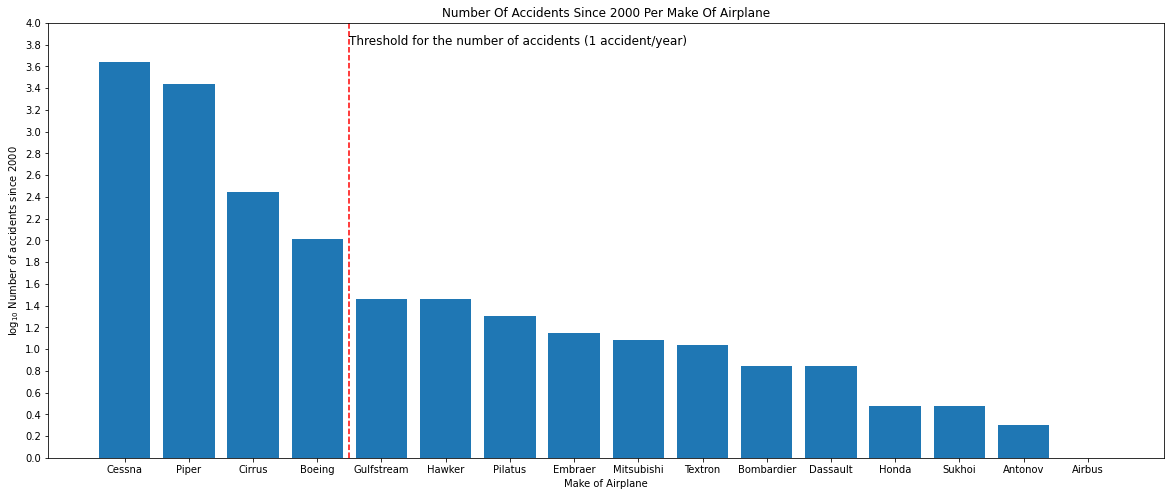

In [248]:
threshhold = 100
X = [key for key,v in make2accidents.items()] #if v>=threshhold]
Y = [value for u,value in make2accidents.items()]# if value>=threshhold]
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(x=X,height=np.log10(Y))
#ax.axhline(24, linestyle='--', color='r')
ax.axvline(3.5, linestyle='--', color='r')
plt.text(3.5,3.8,'Threshold for the number of accidents (1 accident/year)', fontsize='large')
ax.set_xlabel('Make of Airplane')
ax.set_ylabel('log$_{10}$ Number of accidents since 2000')
ax.set_title('Number of accidents since 2000 per make of airplane'.title())
ax.set_yticks(np.arange(0,4.2,0.2));

In [249]:
X_least_accidents = [elem for elem in X if elem not in ['Cessna','Piper','Cirrus','Boeing']]
df_least_accidents = df_top_makes[df_top_makes['Make'].isin(X_least_accidents)]
df_least_accidents

,Aircraft Damage,Make,Model,Amateur Built,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Event Year
50058,Minor,Dassault,MYSTERE FALCON 900,No,Executive/corporate,0.0,0.0,0.0,2001
53036,Minor,Gulfstream,AA-5B,No,Personal,0.0,0.0,0.0,2002
58176,Minor,Gulfstream,690C,No,Personal,0.0,0.0,0.0,2005
59142,Minor,Gulfstream,AA-5A,No,Personal,0.0,0.0,0.0,2005
60041,Minor,Gulfstream,G-200,No,Executive/corporate,0.0,1.0,0.0,2005
...,...,...,...,...,...,...,...,...,...
88620,Minor,Embraer,EMB-545,No,Business,0.0,0.0,0.0,2022
88663,Minor,Gulfstream,AA-5A,No,Personal,0.0,0.0,0.0,2022
88739,Substantial,Hawker,G58,No,Personal,2.0,0.0,0.0,2022
88789,Minor,Honda,HA-420,No,Personal,0.0,0.0,0.0,2022


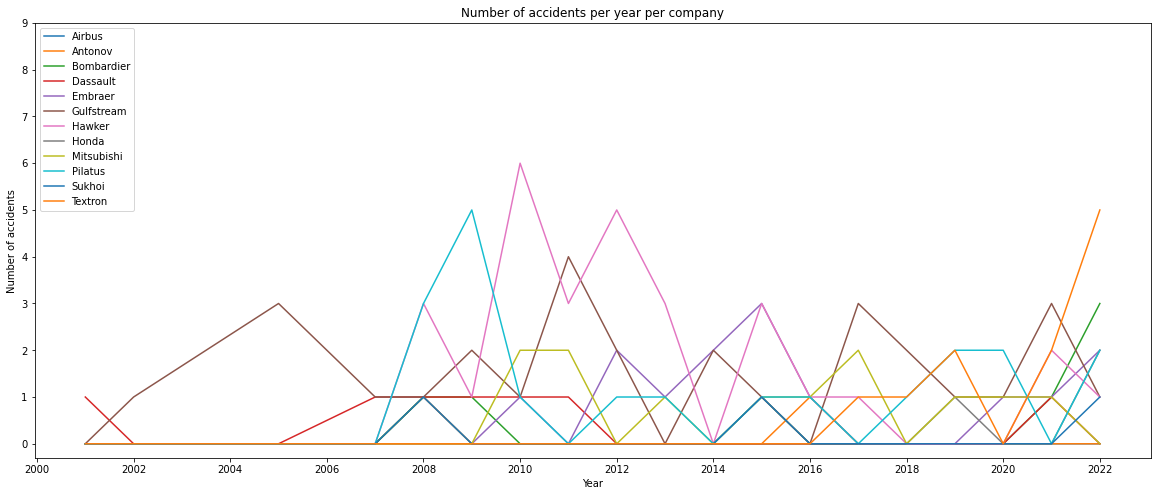

In [250]:
pd.pivot_table(df_least_accidents[['Make','Event Year','Model']],index = 'Event Year',
               columns = 'Make',aggfunc ='count').fillna(0).plot.line(figsize=(20,8))
plt.xticks(np.arange(2000,2024,2))

make2accidents_peryear = df_least_accidents.groupby('Make').count()['Model'].sort_values(ascending=False)
dict_makes_accperyear = dict(make2accidents_peryear)


plt.legend(sorted(dict_makes_accperyear))
plt.yticks(np.arange(0,10,1))
plt.title('Number of accidents per year per company')
plt.xlabel('Year')
plt.ylabel('Number of accidents');

#### Not a lot of insights from this

In [251]:
make2injuries = df_least_accidents.groupby('Make').sum().sort_values(by='Total Fatal Injuries',ascending=False)[['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries']]
make2injuries

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries
Make,,,
Pilatus,45.0,0.0,4.0
Embraer,33.0,0.0,2.0
Gulfstream,32.0,17.0,4.0
Hawker,20.0,1.0,8.0
Mitsubishi,20.0,1.0,0.0
Textron,14.0,3.0,2.0
Airbus,7.0,0.0,0.0
Bombardier,6.0,1.0,1.0
Dassault,2.0,0.0,1.0


<Axes: title={'center': 'Injuries Type and Number per Make'}, xlabel='Make', ylabel='Number of accidents'>

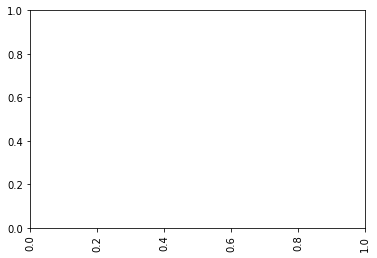

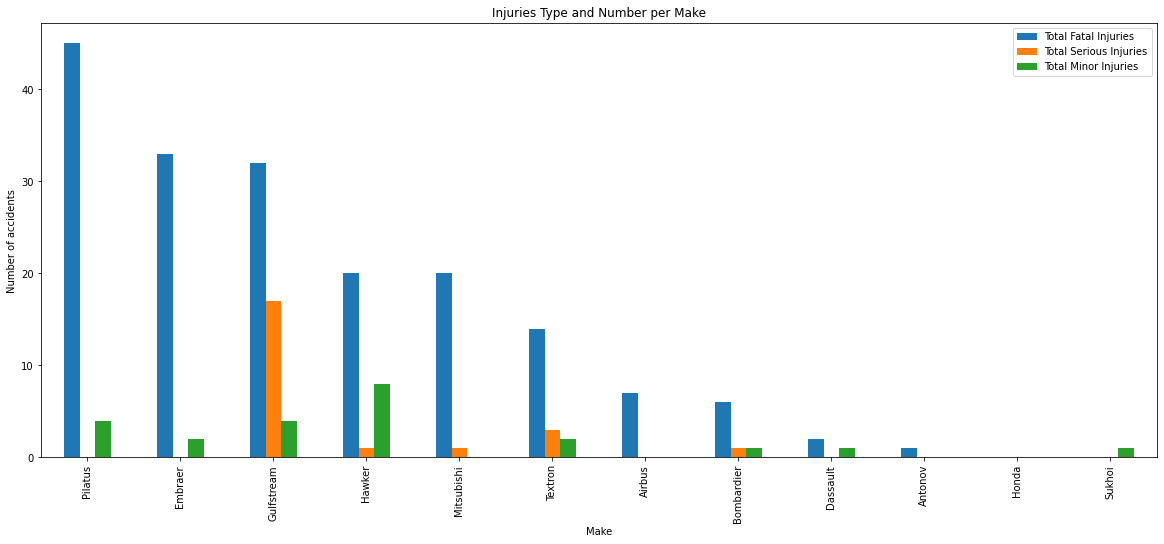

In [252]:
plt.xticks(rotation=90)
make2injuries.plot(y=['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries'], kind='bar', figsize=(20,8), title='Injuries Type and Number per Make', ylabel='Number of accidents')
# display(list(make2injuries.index))